In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import spinmob as sm
import mcphysics as mphys
from scipy.optimize import curve_fit
from scipy.stats.distributions import chi2
from os import listdir
from scipy.signal import find_peaks
import matplotlib as mpl
%matplotlib inline

new_rc_params = {'text.usetex': False,
    "svg.fonttype": 'none'
    }
mpl.rcParams.update(new_rc_params)

In [2]:
import calibration
# These two lines tell your Jupyter notebook to reload
# external modules/functions if they have been modified
# This way you don't have to quit your kernel and import
# everything again whenever you make a change!
%load_ext autoreload
%autoreload 2

## Channel Calibration (first time) with Pulser

In [3]:
#Loading Pulser calibration peaks into array along with measured voltages
pulser_peaks = calibration.Load('Electronic_Calibration')
pulser_vmin = [1.60, 2.12, 2.60, 3.16, 3.68, 4.20, 4.52, 5.20, 5.76, 6.32, 6.88, 7.40, 7.92, 8.49, 8.98, 9.52, 10.10, 10.60]
pulser_vmax = [1.64, 2.16, 2.64, 3.20, 3.72, 4.24, 4.56, 5.24, 5.80, 6.36, 6.88, 7.44, 7.96, 8.49, 9.03, 9.56, 10.10, 10.70]

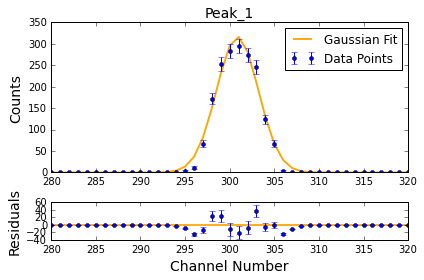

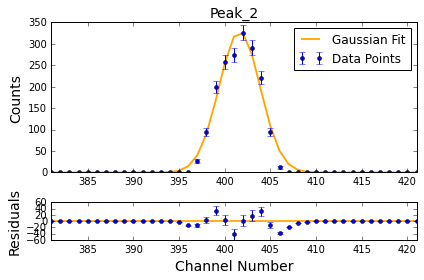

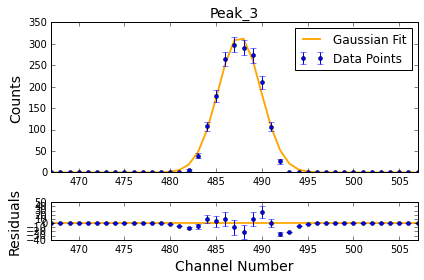

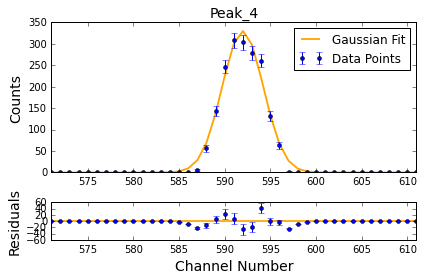

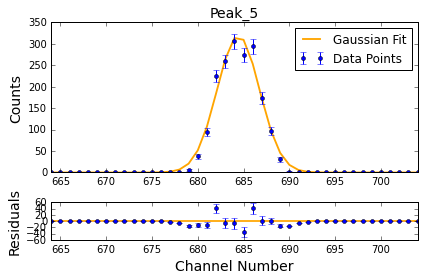

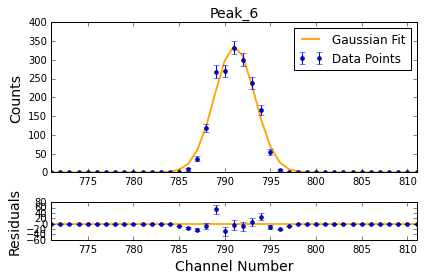

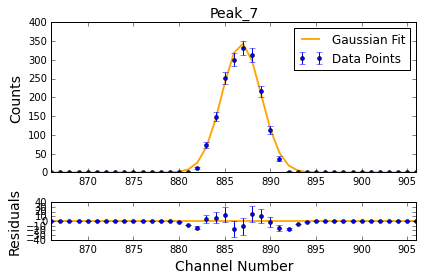

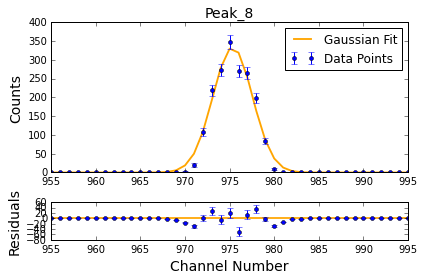

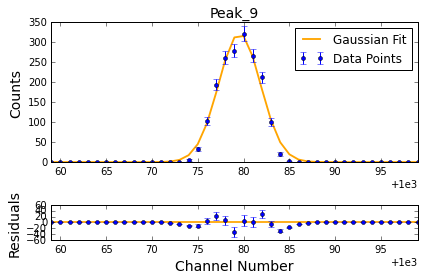

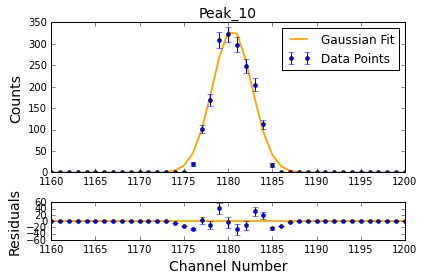

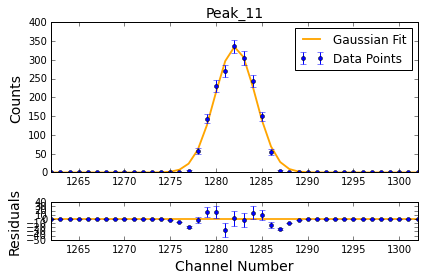

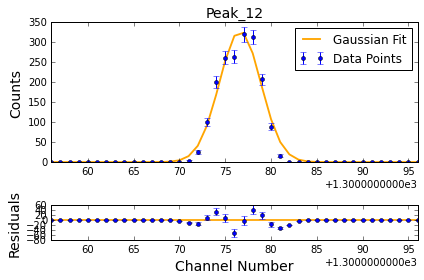

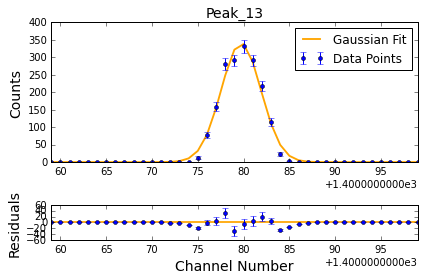

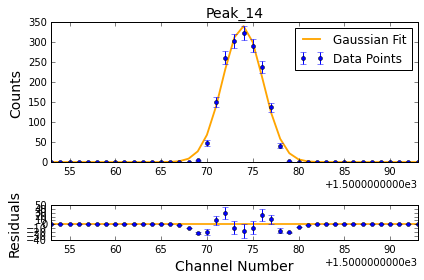

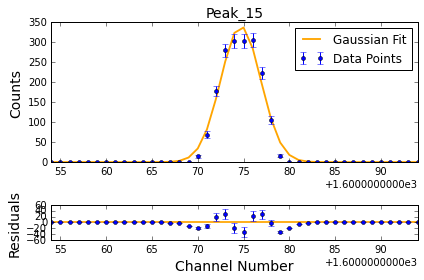

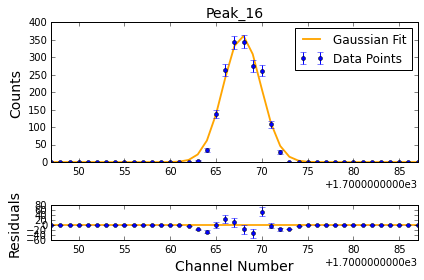

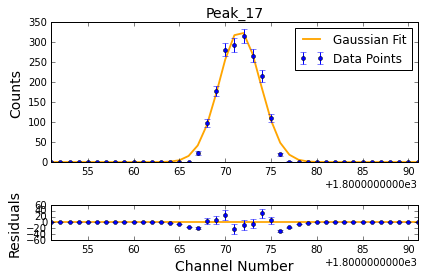

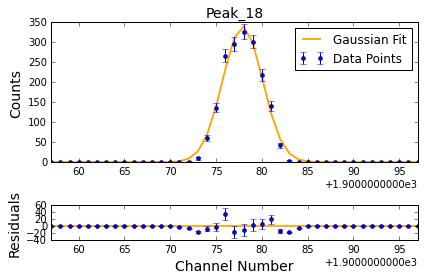

26.40580687091522 1.8307038053275146
41.879486267692094 1.9384141319831814
7.339502192635055 1.9384141319831814
51.81776943607652 1.9384141319831814
22.589554704028185 1.879886400513383
15.84608263171674 1.9384141319831814
20.84822984955599 1.9384141319831814
36.91568669482711 1.9384141319831814
25.419408535808348 1.879886400513383
11.528359833533463 2.009591492762881
30.988546827669005 1.9384141319831814
19.647940138317423 1.9384141319831814
24.334384954056304 1.9384141319831814
44.71240140293324 1.9384141319831814
16.212947671529953 2.009591492762881
18.704151228646335 2.009591492762881
47.27187130982035 1.9384141319831814
24.4089635145028 1.879886400513383


In [4]:
pulser_fits = calibration.Fit_Gauss(pulser_peaks, plotFig=True, width=20)

#List of Reduced Chi Squared Calculated, Reduced Chi Squared Theoretical for each fit
for i in range(len(pulser_fits)):
    print(pulser_fits[i][2], pulser_fits[i][3])

## Calibration 2 (Decreased Amp Gain)

In [165]:
#Loading Pulser calibration peaks into array along with measured voltages
pulser_peaks_2 = calibration.Load('Calibration_02')
pulser_vmin = [1.46, 2.01, 3.12, 3.91, 4.85, 5.86, 6.86, 7.16, 7.77, 8.39, 8.99, 9.54]
pulser_vmax = [1.47, 2.08, 3.18, 3.97, 4.90, 5.89, 6.89, 7.44, 8.08, 8.45, 9.05, 9.64]

In [109]:
pulser_fits_2 = calibration.Fit_Gauss(pulser_peaks_2, plotFig=False, saveFig=True, width=10)

#List of Reduced Chi Squared Calculated, Reduced Chi Squared Theoretical for each fit
for i in range(len(pulser_fits_2)):
    print(pulser_fits_2[i][2], pulser_fits_2[i][3])

4.624092558250861 2.3719322591952885
35.6766454274284 2.6049093010837265
7.550667762051255 2.3719322591952885
3.694457888862078 2.3719322591952885
4.720394823439653 2.3719322591952885
7.859110445827969 2.6049093010837265
3.377485524123759 2.6049093010837265
2.8212632743470287 2.6049093010837265
2.830200876839049 2.6049093010837265
8.11391925568241 2.6049093010837265
9.159365998711895 2.3719322591952885
10.505342168797537 2.6049093010837265


[array([1470.08391258,    0.83860831,  865.12639428])
 array([0.00486446, 0.00455466, 4.19018348]) 2.8212632743470287
 2.6049093010837265]


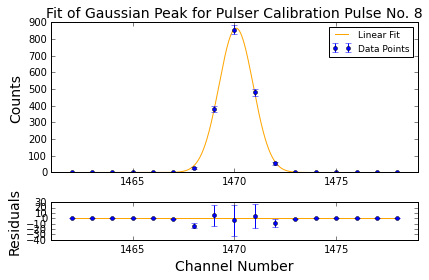

In [337]:
param = pulser_fits_2[7][0]
center = int(param[0])
width = 8
index = [center-width, center+width+1]
xdata = range(2048)[index[0]:index[1]]
yavg = calibration.Gaussian(xdata, *param)
ydata = pulser_peaks_2[7][index[0]:index[1]]
yerr = np.sqrt(ydata)
residuals = ydata - yavg

np.set_printoptions(suppress=True)
print(np.abs(pulser_fits_2[7]))

xfit = np.linspace(index[0], index[1], 1000)
yfit = calibration.Gaussian(xfit, *param)
    
fig, ax = plt.subplots(2, 1, sharey='row', tight_layout = True, gridspec_kw={'height_ratios':[4,1]})
ax[0].errorbar(xdata, ydata, yerr=yerr, fmt='o', markersize='4', label='Data Points')
ax[0].plot(xfit, yfit, color='orange', zorder=-5, linewidth=1, label='Linear Fit')
ax[1].errorbar(xdata, residuals, yerr=yerr, fmt='o', markersize='4')
ax[1].plot(xdata, np.zeros(len(xdata)), zorder=-5, color='orange', linewidth=1)
ax[0].set_xlim(xdata[0]-1, xdata[-1]+1)
ax[1].set_xlim(xdata[0]-1, xdata[-1]+1)
ax[0].ticklabel_format(style='plain')
ax[1].ticklabel_format(style='plain')
ax[0].ticklabel_format(useOffset=False)
ax[1].ticklabel_format(useOffset=False)

ax[1].set_xlabel('Channel Number', fontsize=14)
ax[1].set_ylabel('Residuals', fontsize=14)
ax[0].set_ylabel('Counts', fontsize=14)
ax[0].set_title('Fit of Gaussian Peak for Pulser Calibration Pulse No. 8', fontsize=14)
ax[0].legend(loc='upper right', prop={'size': 9})
fig.savefig('Plots/Pulser.svg')
plt.show()

[ 1.10008404e+03 -1.22887151e+01 -4.49366042e+02 -1.32725779e+01
  1.51339103e+04]


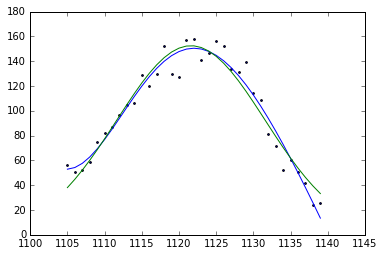

[1.1409393062090587, 1.459099060858073]
[1.4486234547471375, 1.4435706100087022]


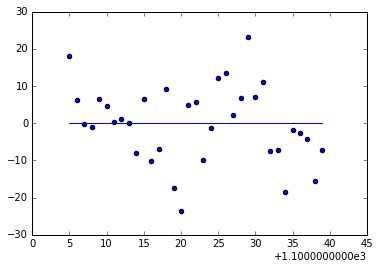

In [129]:
#Conversion between Voltage and Energy
Am_peaks = calibration.Load('Am_Peaks/Calibration_02')
f, ax = plt.subplots(figsize=(6,4))
interval = [1105,1140]
ax.scatter(range(2048)[interval[0]:interval[1]], Am_peaks[0][interval[0]:interval[1]], s=3)

#Fitting double-peaked Gaussian
xdata = range(2048)[interval[0]:interval[1]]
ydata = Am_peaks[0][interval[0]:interval[1]]

test = curve_fit(calibration.Gaussian, xdata, ydata, p0=[1120, 30, 150])[0]

Am_pov, Am_cov = curve_fit(calibration.linear_Gauss, xdata, ydata, p0=[1130, 15, 150, -1, 1])
print(Am_pov)
ax.plot(xdata, calibration.linear_Gauss(xdata, *Am_pov))
ax.plot(xdata, calibration.Gaussian(xdata, *test))
ax.ticklabel_format(style='plain')
ax.ticklabel_format(useOffset=False)
#ax.plot(xdata, calibration.Gaussian(xdata, 1))
f.savefig('Plots/testfitAm.svg')
plt.show()

Am_chi2 = calibration.Chi2(xdata, ydata, np.sqrt(ydata), Am_pov, calibration.linear_Gauss)
test_chi2 = calibration.Chi2(xdata, ydata, np.sqrt(ydata), test, calibration.Gaussian)
print(Am_chi2)
print(test_chi2)

#plt.scatter(xdata, ydata - calibration.linear_Gauss(xdata, *Am_pov))
plt.scatter(xdata, ydata - calibration.Gaussian(xdata, *test))
plt.plot(xdata, np.zeros(len(xdata)))
plt.show()

[1121.605517      9.96605276  152.5053601 ]
[0.24808209 0.28961551 3.25320298]
[1.4486234547471375, 1.4435706100087022]


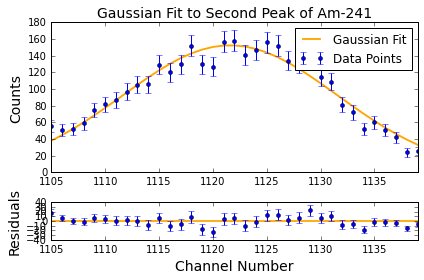

In [329]:
#Fit for Second peak of Am-241
#Conversion between Voltage and Energy
Am_peaks = calibration.Load('Am_Peaks/Calibration_02')
interval = [1105,1140]

#Fitting double-peaked Gaussian
xdata = range(2048)[interval[0]:interval[1]]
ydata = Am_peaks[0][interval[0]:interval[1]]

Am_pov, Am_cov = curve_fit(calibration.Gaussian, xdata, ydata, p0=[1120, 30, 150])
print(Am_pov), print(np.sqrt(np.diag(Am_cov)))

Am_fit = calibration.Gaussian(xdata, *Am_pov)
Am_err = np.sqrt(ydata)
Am_chi2 = calibration.Chi2(xdata, ydata, np.sqrt(ydata), Am_pov, calibration.Gaussian)
print(Am_chi2)

calibration.Plot(xdata, ydata, Am_fit, Am_err, 'Gaussian Fit to Second Peak of Am-241', plotFig = True, saveFig = False)

## Channel Number vs Voltage

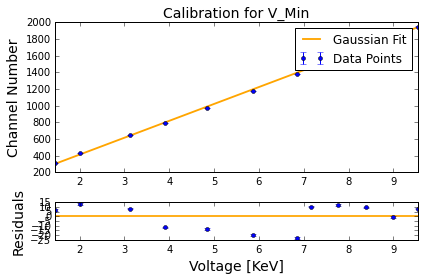

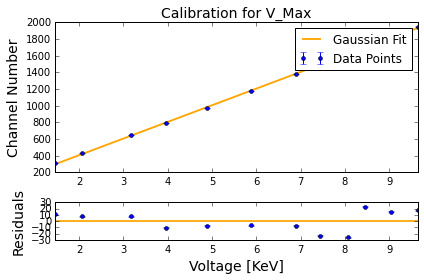

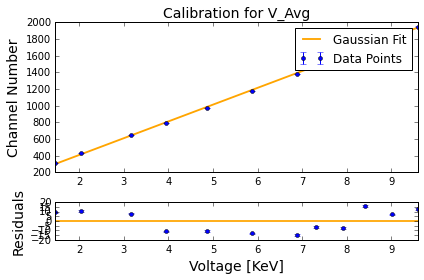

[378.7574557269046, 1.8307038053275146] [270.42759741031387, 1.8307038053275146] [202.15535133208155, 1.8307038053275146]
[199.77252253   7.00725576] [202.53084294   9.58087783] [201.1952295    7.97394211]


In [167]:
#Channel num vs. Voltage fit

#Array of channel numbers, assoc. err for pulser_vmin/pulser_vmax
#loc of peak, systematic err, statistical err
pulser_channels = []
for i in range(len(pulser_fits_2)):
    val = [pulser_fits_2[i][0][0], np.abs(pulser_fits_2[i][0][1]), pulser_fits_2[i][1][0]]
    pulser_channels.append(val)
pulser_channels = np.asarray(pulser_channels).T

#Vmin
ydata = pulser_channels[0]
yerr = pulser_channels[1]
xmin = np.asarray(pulser_vmin)
vmin_fit, vmin_err = curve_fit(calibration.Linear, xmin, ydata, p0=[1, 1])
vmin_err = np.sqrt(np.diag(vmin_err))
ymin = calibration.Linear(xmin, *vmin_fit)
chi2_min = calibration.ChiSq_Linear(xmin, ydata, yerr, vmin_fit)

#Vmax
xmax = np.asarray(pulser_vmax)
vmax_fit, vmax_err = curve_fit(calibration.Linear, xmax, ydata, p0=vmin_fit)
vmax_err = np.sqrt(np.diag(vmax_err))
ymax = calibration.Linear(xmax, *vmax_fit)
chi2_max = calibration.ChiSq_Linear(xmax, ydata, yerr, vmax_fit)

#Vcenter
pulser_vavg = (np.asarray(pulser_vmin) + np.asarray(pulser_vmax)) / 2
pulser_verr = np.asarray(pulser_vmax) - pulser_vavg
xavg = np.asarray(pulser_vavg)
vavg_pov, vavg_cov = curve_fit(calibration.Linear, xavg, ydata, p0=[1,1])
yavg = calibration.Linear(xavg, *vavg_pov)
chi2_avg = calibration.ChiSq_Linear(xavg, ydata, yerr, vavg_pov)

#Plotting
calibration.Plot(xmin, ydata, ymin, yerr, 'Calibration for V_Min', 
                 plotFig = True, saveFig = True, xlab = 'Voltage [KeV]', ylab = 'Channel Number')

calibration.Plot(xmax, ydata, ymax, yerr, 'Calibration for V_Max', 
                 plotFig = True, saveFig = True, xlab = 'Voltage [KeV]', ylab = 'Channel Number')

calibration.Plot(xavg, ydata, yavg, yerr, 'Calibration for V_Avg', 
                 plotFig = True, saveFig = True, xlab = 'Voltage [KeV]', ylab = 'Channel Number')

print(chi2_max, chi2_min, chi2_avg)
print(vmax_fit, vmin_fit, vavg_pov)

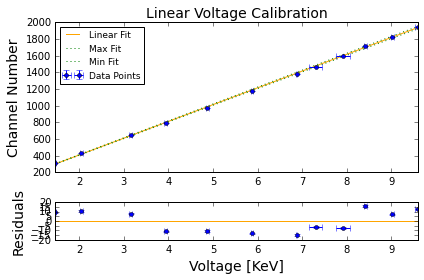

In [183]:
residuals = ydata - yavg
    
fig, ax = plt.subplots(2, 1, sharey='row', tight_layout = True, gridspec_kw={'height_ratios':[4,1]})
ax[0].errorbar(xavg, ydata, yerr=yerr, xerr=pulser_verr, fmt='o', markersize='4', label='Data Points')
ax[0].plot(xavg, yavg, color='orange', zorder=-5, linewidth=1, label='Linear Fit')
ax[1].errorbar(xavg, residuals, yerr=yerr, xerr = pulser_verr, fmt='o', markersize='4')
ax[1].plot(xavg, np.zeros(len(xavg)), zorder=-5, color='orange', linewidth=1)
ax[0].set_xlim(xavg[0], xavg[-1])
ax[1].set_xlim(xavg[0], xavg[-1])
ax[0].ticklabel_format(style='plain')
ax[1].ticklabel_format(style='plain')
ax[0].ticklabel_format(useOffset=False)
ax[1].ticklabel_format(useOffset=False)

ax[0].plot(xmax, ymax, color='g', zorder=-5, linewidth=1, label='Max Fit', linestyle='dotted')
ax[0].plot(xmin, ymin, color='g', zorder=-5, linewidth=1, label='Min Fit', linestyle='dotted')

ax[1].set_xlabel('Voltage [KeV]', fontsize=14)
ax[1].set_ylabel('Residuals', fontsize=14)
ax[0].set_ylabel('Channel Number', fontsize=14)
ax[0].set_title('Linear Voltage Calibration', fontsize=14)
ax[0].legend(loc='upper left', prop={'size': 9})
plt.show()

In [191]:
#Going to deal with the systematics by finding all possible values for voltages for a given energy
Am_energy = 5485.6

#channel, systematic err, stat err for energy of 5485.6KeV
Am_center = [Am_pov[0], np.abs(Am_pov[1]), np.sqrt(np.diag(Am_cov))[0]]

#Using values for Vavg
Voltage_avg = calibration.LinearInv(Am_center[0], *vavg_pov)
v_to_e = Am_energy / Voltage_avg
print(v_to_e)

991.0607563803527


4.624092558250861 2.3719322591952885
35.6766454274284 2.6049093010837265
7.550667762051255 2.3719322591952885
3.694457888862078 2.3719322591952885
4.720394823439653 2.3719322591952885
7.859110445827969 2.6049093010837265
3.377485524123759 2.6049093010837265
2.8212632743470287 2.6049093010837265
2.830200876839049 2.6049093010837265
8.11391925568241 2.6049093010837265
9.159365998711895 2.3719322591952885
10.505342168797537 2.6049093010837265
[378.7574556997338, 1.8307038053275146] [270.42759776438345, 1.8307038053275146] [202.1553497213401, 1.8307038053275146]
[0.20157445 7.00725496] [0.20435765 9.58087776] [0.20300999 7.97393103]


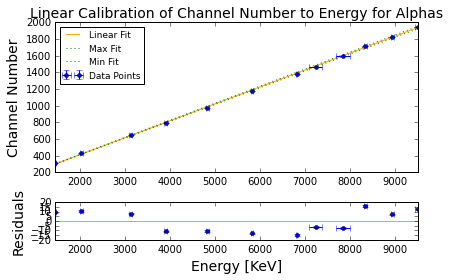

In [194]:
#Loading Pulser calibration peaks into array along with measured voltages
pulser_peaks_2 = calibration.Load('Calibration_02')
pulser_vmin = np.asarray([1.46, 2.01, 3.12, 3.91, 4.85, 5.86, 6.86, 7.16, 7.77, 8.39, 8.99, 9.54]) * v_to_e
pulser_vmax = np.asarray([1.47, 2.08, 3.18, 3.97, 4.90, 5.89, 6.89, 7.44, 8.08, 8.45, 9.05, 9.64]) * v_to_e

pulser_fits_2 = calibration.Fit_Gauss(pulser_peaks_2, plotFig=False, saveFig=True, width=10)

#List of Reduced Chi Squared Calculated, Reduced Chi Squared Theoretical for each fit
for i in range(len(pulser_fits_2)):
    print(pulser_fits_2[i][2], pulser_fits_2[i][3])
    
#Channel num vs. Voltage fit

#Array of channel numbers, assoc. err for pulser_vmin/pulser_vmax
#loc of peak, systematic err, statistical err
pulser_channels = []
for i in range(len(pulser_fits_2)):
    val = [pulser_fits_2[i][0][0], np.abs(pulser_fits_2[i][0][1]), pulser_fits_2[i][1][0]]
    pulser_channels.append(val)
pulser_channels = np.asarray(pulser_channels).T

#Vmin
ydata = pulser_channels[0]
yerr = pulser_channels[1]
xmin = np.asarray(pulser_vmin)
vmin_fit, vmin_err = curve_fit(calibration.Linear, xmin, ydata, p0=[1, 1])
vmin_err = np.sqrt(np.diag(vmin_err))
ymin = calibration.Linear(xmin, *vmin_fit)
chi2_min = calibration.ChiSq_Linear(xmin, ydata, yerr, vmin_fit)

#Vmax
xmax = np.asarray(pulser_vmax)
vmax_fit, vmax_err = curve_fit(calibration.Linear, xmax, ydata, p0=vmin_fit)
vmax_err = np.sqrt(np.diag(vmax_err))
ymax = calibration.Linear(xmax, *vmax_fit)
chi2_max = calibration.ChiSq_Linear(xmax, ydata, yerr, vmax_fit)

#Vcenter
pulser_vavg = (np.asarray(pulser_vmin) + np.asarray(pulser_vmax)) / 2
pulser_verr = np.asarray(pulser_vmax) - pulser_vavg
xavg = np.asarray(pulser_vavg)
vavg_pov, vavg_cov = curve_fit(calibration.Linear, xavg, ydata, p0=[1,1])
yavg = calibration.Linear(xavg, *vavg_pov)
chi2_avg = calibration.ChiSq_Linear(xavg, ydata, yerr, vavg_pov)

print(chi2_max, chi2_min, chi2_avg)
print(vmax_fit, vmin_fit, vavg_pov)

residuals = ydata - yavg
    
fig, ax = plt.subplots(2, 1, sharey='row', tight_layout = True, gridspec_kw={'height_ratios':[4,1]})
ax[0].errorbar(xavg, ydata, yerr=yerr, xerr=pulser_verr, fmt='o', markersize='4', label='Data Points')
ax[0].plot(xavg, yavg, color='orange', zorder=-5, linewidth=1, label='Linear Fit')
ax[1].errorbar(xavg, residuals, yerr=yerr, xerr = pulser_verr, fmt='o', markersize='4')
ax[1].plot(xavg, np.zeros(len(xavg)), zorder=-5, color='orange', linewidth=1)
ax[0].set_xlim(xavg[0], xavg[-1])
ax[1].set_xlim(xavg[0], xavg[-1])
ax[0].ticklabel_format(style='plain')
ax[1].ticklabel_format(style='plain')
ax[0].ticklabel_format(useOffset=False)
ax[1].ticklabel_format(useOffset=False)

ax[0].plot(xmax, ymax, color='g', zorder=-5, linewidth=1, label='Max Fit', linestyle='dotted')
ax[0].plot(xmin, ymin, color='g', zorder=-5, linewidth=1, label='Min Fit', linestyle='dotted')

ax[1].set_xlabel('Energy [KeV]', fontsize=14)
ax[1].set_ylabel('Residuals', fontsize=14)
ax[0].set_ylabel('Channel Number', fontsize=14)
ax[0].set_title('Linear Calibration of Channel Number to Energy for Alphas', fontsize=14)
ax[0].legend(loc='upper left', prop={'size': 9})
fig.savefig('Plots/Linear_Calibration.svg')
plt.show()

In [201]:
#Fit Values for Linear Calibration
stat_err = np.sqrt(np.diag(vavg_cov))
print(vavg_pov)
slope = vavg_pov[0]
slope_stat_err = stat_err[0]
slope_syst_err_up = vmin_fit[0] - slope
slope_syst_err_low = slope - vmax_fit[0]
print(slope, slope_stat_err, slope_syst_err_up, slope_syst_err_low)

intercept = vavg_pov[1]
intercept_stat_err = stat_err[1]
intercept_syst_err_up = vmin_fit[1] - intercept
intercept_syst_err_low = intercept - vmax_fit[1]

print(intercept, intercept_stat_err, intercept_syst_err_up, intercept_syst_err_low)

[0.20300999 7.97393103]
0.20300998680213875 0.001330507815148546 0.0013476590031866742 0.0014355410768583654
7.973931034003558 8.49151682643614 1.606946723111884 0.9666760711105216


## Pressure Experiment

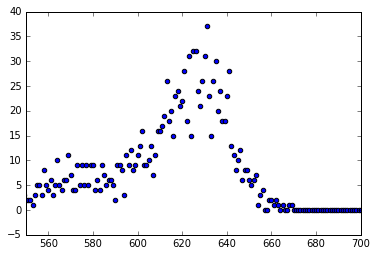

2.1164516745817505 1.370138519472879
1.4034259585457118 1.379151442486042
1.574102663850712 1.3888387108981484
1.616745975504061 1.3464567433781525
1.7925718220985225 1.3992878912549163
1.3318386798755208 1.3329362368924225


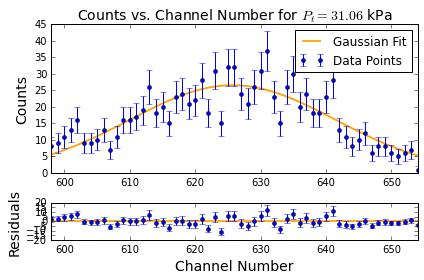

[array([625.72993085,  15.7091109 ,  26.56296631]), array([0.78367966, 0.89651526, 1.14016126]), 1.3318386798755208, 1.3329362368924225]


In [304]:
p_max = np.asarray([11.66, 15.91, 18.33, 20.97, 23.62, 31.11])
p_min = np.asarray([11.53, 15.81, 18.28, 20.90, 23.48, 31.01])
p_avg = (p_max + p_min) / 2
p_avg_err = p_max - p_avg

p_data = calibration.Load('Pressure_Peaks')
xrange = range(2048)
plt.scatter(xrange, p_data[5])
plt.xlim(550, 700)
plt.ticklabel_format(useOffset=False)
plt.show()

p1 = calibration.Fit(p_data[0], center=963, width=23)
p2 = calibration.Fit(p_data[1], center=897, width=22)
p3 = calibration.Fit(p_data[2], center=858, width=21)
p4 = calibration.Fit(p_data[3], center=813, width=26)
p5 = calibration.Fit(p_data[4], center=768, width=20)
p6 = calibration.Fit(p_data[5], center=626, width=28)

test = [p1, p2, p3, p4, p5, p6]
for i in range(6):
    print(test[i][2], test[i][3])

interval=[626-28, 626+29]
x6 = xrange[interval[0]: interval[1]]
y6 = p_data[5][interval[0]: interval[1]]
yfit6 = calibration.Gaussian(x6, *p6[0])
yerr6 = np.sqrt(y6)
calibration.Plot(x=x6, y=y6, yfit=yfit6, err=yerr6, Name='Counts vs. Channel Number for $P_t = 31.06$ kPa', 
                 plotFig = True, saveFig = True)
print(p6)

[1.49066327 1.33109269 1.60028637 1.26121484 2.14024334 3.86030104] [54.79260263 56.12083584 58.22518479 60.70322075 62.92894638 77.38097594]
[ -85.53314538 5733.92239601] [ 2.10515259 44.48017723]


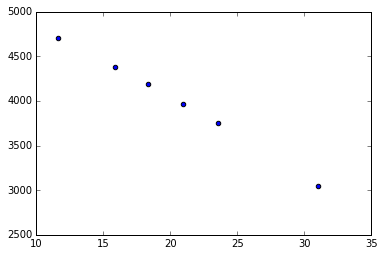

[0.2586572584856781, 2.3719322591952885]


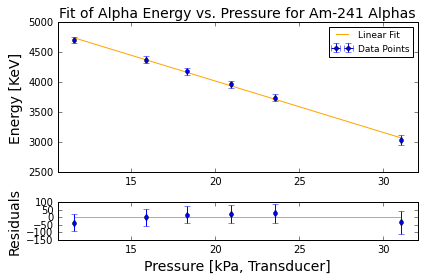

In [328]:
p_max = np.asarray([11.66, 15.91, 18.33, 20.97, 23.62, 31.11])
p_min = np.asarray([11.53, 15.81, 18.28, 20.90, 23.48, 31.01])
p_avg = (p_max + p_min) / 2
p_avg_err = p_max - p_avg

p_channels = np.asarray([p1[0][0], p2[0][0], p3[0][0], p4[0][0], p5[0][0], p6[0][0]])
p_channels_stat = np.asarray([p1[1][0], p2[1][0], p3[1][0], p4[1][0], p5[1][0], p6[1][0]])
p_channels_syst = np.asarray([p1[0][1], p2[0][1], p3[0][1], p4[0][1], p5[0][1], p6[0][1]])

#Energy Determination
a, b = slope, intercept           
p_energies = calibration.LinearInv(p_channels, a, b)
p_energies_stat = p_channels_stat / a
p_energies_syst = p_channels_syst / a
print(p_energies_stat, p_energies_syst)

#Pressure Fit

p_pov, p_cov = curve_fit(calibration.Linear, p_avg, p_energies, p0=[-5, 5000])
print(p_pov, np.sqrt(np.diag(p_cov)))

plt.scatter(p_avg, p_energies)
plt.show()

xdata = p_avg
xerr = p_avg_err
ydata = p_energies
yerr = p_energies_syst
param = p_pov
p_chi2 = calibration.ChiSq_Linear(xdata, ydata, yerr, param)
print(p_chi2)

yavg = calibration.Linear(xdata, *param)
residuals = ydata - yavg
    
fig, ax = plt.subplots(2, 1, sharey='row', tight_layout = True, gridspec_kw={'height_ratios':[4,1]})
ax[0].errorbar(xdata, ydata, yerr=yerr, xerr=xerr, fmt='o', markersize='4', label='Data Points')
ax[0].plot(xdata, yavg, color='orange', zorder=-5, linewidth=1, label='Linear Fit')
ax[1].errorbar(xdata, residuals, yerr=yerr, xerr = xerr, fmt='o', markersize='4')
ax[1].plot(xdata, np.zeros(len(xdata)), zorder=-5, color='orange', linewidth=1)
ax[0].set_xlim(xdata[0]-1, xdata[-1]+1)
ax[1].set_xlim(xdata[0]-1, xdata[-1]+1)
ax[0].ticklabel_format(style='plain')
ax[1].ticklabel_format(style='plain')
ax[0].ticklabel_format(useOffset=False)
ax[1].ticklabel_format(useOffset=False)

ax[1].set_xlabel('Pressure [kPa, Transducer]', fontsize=14)
ax[1].set_ylabel('Residuals', fontsize=14)
ax[0].set_ylabel('Energy [KeV]', fontsize=14)
ax[0].set_title('Fit of Alpha Energy vs. Pressure for Am-241 Alphas', fontsize=14)
ax[0].legend(loc='upper right', prop={'size': 9})
fig.savefig('Plots/Pressure.svg')
plt.show()